# Plotting Inference Times

We will first try initial plotting for simple two layer fully connected networks from our log file.

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

%matplotlib inline
sns.set()

In [14]:
logfile = Path.cwd().parent / 'log.log'
logs = logfile.read_text()

Preprocess the logs. Should be in the format `model_path`,`inftime` in microseconds.

In [42]:
df = pd.DataFrame([x.split(',') for x in logs.split('\n')])
df.columns = ['model_path', 'inftime']
df = df.dropna()
df = df[df.inftime != 'None']
df.inftime = df.inftime.astype('float')

Parse out the model name, should be in the format:

```
twolayer_{first}_{second}
```

In [45]:
df['model_name'] = df.model_path.map(lambda x: x.split('/')[-2])

In [77]:
df['first_layer'] = df.model_name.map(lambda x: int(x.split('_')[1]))
df['second_layer'] = df.model_name.map(lambda x: int(x.split('_')[2]))
df['first_layer_str'] = df.first_layer.map(lambda x: "First Layer Size: " + str(x))
df['second_layer_str'] = df.second_layer.map(lambda x: "Second Layer Size: " + str(x))

In [87]:
df['total_params'] = (df.first_layer + df.second_layer)
df['Total Number of Parameters'] = df.total_params
df['Inference Time (ms)'] = df.inftime / 1000.0

In [84]:
df = df.sort_values('inftime')

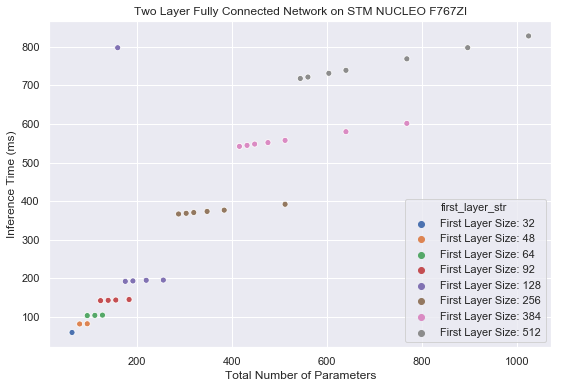

In [89]:
plt.figure(figsize=(9, 6))
plt.title("Two Layer Fully Connected Network on STM NUCLEO F767ZI")
sns.scatterplot(x='Total Number of Parameters', y='Inference Time (ms)', 
                data=df, hue='first_layer_str')
plt.show()

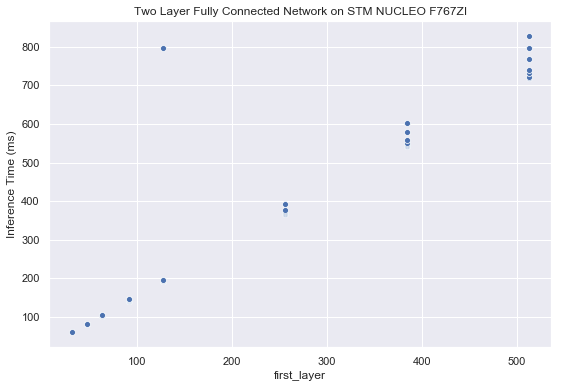

In [96]:
plt.figure(figsize=(9, 6))
plt.title("Two Layer Fully Connected Network on STM NUCLEO F767ZI")
sns.scatterplot(x='first_layer', y='Inference Time (ms)', 
                data=df)
plt.show()